In [180]:
!pip install mlxtend

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions #new library, used for plotting
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [182]:
df = pd.DataFrame()
df['X1'] = np.random.randint(20,30,25)
df['X2'] = np.random.randint(20,30,25)
df['sal'] = np.random.randint(100,10000,25)
df['label'] = df['sal'].apply(lambda x:1 if x>5000 else 0)
df.drop('sal',inplace=True,axis=1)
df.head(7)

,X1,X2,label
0,28,21,0
1,25,26,0
2,20,28,0
3,23,24,1
4,24,21,1
5,24,29,0
6,21,28,1


In [184]:
df['weights'] = 1/df.shape[0] #taking the weights of each row
df.head()

,X1,X2,label,weights
0,28,21,0,0.04
1,25,26,0,0.04
2,20,28,0,0.04
3,23,24,1,0.04
4,24,21,1,0.04


In [185]:
dt = DecisionTreeClassifier(max_depth=1) #assigning depth as 1, making the stumps

In [186]:
X = df.iloc[:,0:2].values #values from first and second columns only in another dataframe
y = df.iloc[:,2].values #values of third column in another dataframe

In [187]:
X

array([[28, 21],
       [25, 26],
       [20, 28],
       [23, 24],
       [24, 21],
       [24, 29],
       [21, 28],
       [20, 26],
       [24, 24],
       [25, 24],
       [21, 20],
       [21, 28],
       [22, 22],
       [27, 24],
       [23, 23],
       [21, 29],
       [23, 29],
       [20, 28],
       [20, 27],
       [23, 22],
       [24, 21],
       [28, 26],
       [27, 20],
       [29, 28],
       [27, 25]])

In [188]:
y

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [189]:
dt.fit(X,y) #training the model for the first time, taking the best by default

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 20.5\ngini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.49\nsamples = 21\nvalue = [12, 9]')]

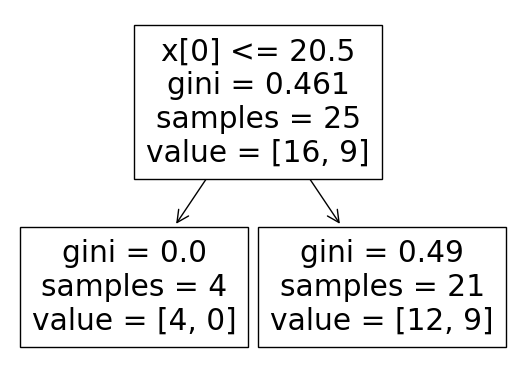

In [190]:
plot_tree(dt) 

In [192]:
df['y_pred'] = dt.predict(X) #y_pred is dt based on X
df

,X1,X2,label,weights,y_pred
0,28,21,0,0.04,0
1,25,26,0,0.04,0
2,20,28,0,0.04,0
3,23,24,1,0.04,0
4,24,21,1,0.04,0
5,24,29,0,0.04,0
6,21,28,1,0.04,0
7,20,26,0,0.04,0
8,24,24,0,0.04,0
9,25,24,0,0.04,0


In [193]:
def AOS(error): #making a function to calculate the model weight with error as input
    return 0.5*np.log((1-error)/(error))

In [237]:
a1 = AOS(0.36) #calling the function above, we are taking the value of error as 0.3 here as the weights for the wrong prediction add upto 0.3
a1

0.28768207245178096

In [238]:
def update_row_weights(row,a1=0.28768207245178096): #updating the weights 
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-1*a1)
    else:
        return row['weights'] * np.exp(a1)

In [239]:
df['updated_weights'] = df.apply(update_row_weights,axis=1) #new column in dataset to show updated weights
df     

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,28,21,0,0.04,0,0.030000,0.027027,0.027027,0.000000
1,25,26,0,0.04,0,0.030000,0.027027,0.054054,0.027027
2,20,28,0,0.04,0,0.030000,0.027027,0.081081,0.054054
3,23,24,1,0.04,0,0.053333,0.063063,0.144144,0.081081
4,24,21,1,0.04,0,0.053333,0.063063,0.207207,0.144144
5,24,29,0,0.04,0,0.030000,0.027027,0.234234,0.207207
6,21,28,1,0.04,0,0.053333,0.063063,0.297297,0.234234
7,20,26,0,0.04,0,0.030000,0.027027,0.324324,0.297297
8,24,24,0,0.04,0,0.030000,0.027027,0.351351,0.324324
9,25,24,0,0.04,0,0.030000,0.027027,0.378378,0.351351


In [240]:
#where there is error, the updated_weights have a higher value than the rest.

In [241]:
df['updated_weights'].sum() #checking whether their sum is 1.
print("Sum of updated weights = ",df['updated_weights'].sum())

df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum() #normalizing it so that sum equals 1.
df

Sum of updated weights =  0.9600000000000001


,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,28,21,0,0.04,0,0.030000,0.031250,0.027027,0.000000
1,25,26,0,0.04,0,0.030000,0.031250,0.054054,0.027027
2,20,28,0,0.04,0,0.030000,0.031250,0.081081,0.054054
3,23,24,1,0.04,0,0.053333,0.055556,0.144144,0.081081
4,24,21,1,0.04,0,0.053333,0.055556,0.207207,0.144144
5,24,29,0,0.04,0,0.030000,0.031250,0.234234,0.207207
6,21,28,1,0.04,0,0.053333,0.055556,0.297297,0.234234
7,20,26,0,0.04,0,0.030000,0.031250,0.324324,0.297297
8,24,24,0,0.04,0,0.030000,0.031250,0.351351,0.324324
9,25,24,0,0.04,0,0.030000,0.031250,0.378378,0.351351


In [242]:
df['normalized_weights'].sum()
print("Sum of normalized weights = ",df['normalized_weights'].sum()) #close to 1 so it goes.

Sum of normalized weights =  1.0


In [243]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights']) #using cumsum function in numpy, we are taking in the upper range and storing it in a new variable in the dataset
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights'] #similar explanation as given above but for lower range
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,28,21,0,0.04,0,0.030000,0.031250,0.031250,0.000000
1,25,26,0,0.04,0,0.030000,0.031250,0.062500,0.031250
2,20,28,0,0.04,0,0.030000,0.031250,0.093750,0.062500
3,23,24,1,0.04,0,0.053333,0.055556,0.149306,0.093750
4,24,21,1,0.04,0,0.053333,0.055556,0.204861,0.149306
5,24,29,0,0.04,0,0.030000,0.031250,0.236111,0.204861
6,21,28,1,0.04,0,0.053333,0.055556,0.291667,0.236111
7,20,26,0,0.04,0,0.030000,0.031250,0.322917,0.291667
8,24,24,0,0.04,0,0.030000,0.031250,0.354167,0.322917
9,25,24,0,0.04,0,0.030000,0.031250,0.385417,0.354167


In [244]:
def create_new_dataset(df): #making a new dataset to create random numbers
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [245]:
rand_values = create_new_dataset(df)
rand_values

[19,
 14,
 8,
 8,
 2,
 3,
 23,
 4,
 22,
 19,
 11,
 19,
 2,
 24,
 1,
 12,
 4,
 18,
 15,
 3,
 12,
 8,
 4,
 11,
 10]

In [246]:
df2 = df.iloc[rand_values,[0,1,2,3]] #new dataframe with random values and columns till weights in df
df2

,X1,X2,label,weights
19,23,22,0,0.04
14,23,23,0,0.04
8,24,24,0,0.04
8,24,24,0,0.04
2,20,28,0,0.04
3,23,24,1,0.04
23,29,28,1,0.04
4,24,21,1,0.04
22,27,20,0,0.04
19,23,22,0,0.04


In [247]:
dt2 = DecisionTreeClassifier(max_depth=1) #essentially looping over here

In [248]:
X = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

In [249]:
dt2.fit(X,y) 

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 20.5\ngini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.496\nsamples = 22\nvalue = [10, 12]')]

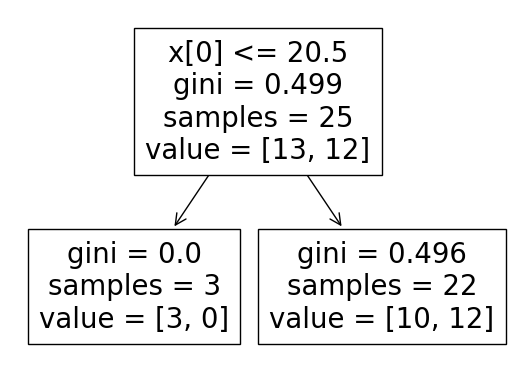

In [250]:
plot_tree(dt2)

In [251]:
df2['y_pred'] = dt2.predict(X)
df2

,X1,X2,label,weights,y_pred
19,23,22,0,0.04,1
14,23,23,0,0.04,1
8,24,24,0,0.04,1
8,24,24,0,0.04,1
2,20,28,0,0.04,0
3,23,24,1,0.04,1
23,29,28,1,0.04,1
4,24,21,1,0.04,1
22,27,20,0,0.04,1
19,23,22,0,0.04,1


In [253]:
a2 = AOS(0.4) #since division by 0 is not possible, taking a very small value.
a2

0.2027325540540821

In [254]:
def update_row_weights(row,a2=0.2027325540540821):
     if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-a2)
     else:
        return row['weights'] * np.exp(a2)

In [255]:
df2['updated_weights'] = df2.apply(update_row_weights,axis=1)
df2

,X1,X2,label,weights,y_pred,updated_weights
19,23,22,0,0.04,1,0.04899
14,23,23,0,0.04,1,0.04899
8,24,24,0,0.04,1,0.04899
8,24,24,0,0.04,1,0.04899
2,20,28,0,0.04,0,0.03266
3,23,24,1,0.04,1,0.03266
23,29,28,1,0.04,1,0.03266
4,24,21,1,0.04,1,0.03266
22,27,20,0,0.04,1,0.04899
19,23,22,0,0.04,1,0.04899


In [256]:
df2['nomalized_weights'] = df2['updated_weights']/df2['updated_weights'].sum()
df2

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
19,23,22,0,0.04,1,0.04899,0.050000
14,23,23,0,0.04,1,0.04899,0.050000
8,24,24,0,0.04,1,0.04899,0.050000
8,24,24,0,0.04,1,0.04899,0.050000
2,20,28,0,0.04,0,0.03266,0.033333
3,23,24,1,0.04,1,0.03266,0.033333
23,29,28,1,0.04,1,0.03266,0.033333
4,24,21,1,0.04,1,0.03266,0.033333
22,27,20,0,0.04,1,0.04899,0.050000
19,23,22,0,0.04,1,0.04899,0.050000


In [257]:
df2['nomalized_weights'].sum()

1.0

In [258]:
df2['cumsum_upper'] = np.cumsum(df2['nomalized_weights'])
df2['cumsum_lower'] = df2['cumsum_upper'] - df2['nomalized_weights']
df2

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
19,23,22,0,0.04,1,0.04899,0.050000,0.050000,0.000000
14,23,23,0,0.04,1,0.04899,0.050000,0.100000,0.050000
8,24,24,0,0.04,1,0.04899,0.050000,0.150000,0.100000
8,24,24,0,0.04,1,0.04899,0.050000,0.200000,0.150000
2,20,28,0,0.04,0,0.03266,0.033333,0.233333,0.200000
3,23,24,1,0.04,1,0.03266,0.033333,0.266667,0.233333
23,29,28,1,0.04,1,0.03266,0.033333,0.300000,0.266667
4,24,21,1,0.04,1,0.03266,0.033333,0.333333,0.300000
22,27,20,0,0.04,1,0.04899,0.050000,0.383333,0.333333
19,23,22,0,0.04,1,0.04899,0.050000,0.433333,0.383333


In [259]:
rand_values = create_new_dataset(df2)
df3 = df2.iloc[rand_values,[0,1,2,3]]
df3

,X1,X2,label,weights
3,23,24,1,0.04
3,23,24,1,0.04
2,20,28,0,0.04
1,25,26,0,0.04
11,21,28,1,0.04
3,23,24,1,0.04
3,23,24,1,0.04
19,23,22,0,0.04
10,21,20,1,0.04
22,27,20,0,0.04


In [260]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [261]:
X = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

In [262]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [263]:
df3['y_pred'] = dt3.predict(X)
df3

,X1,X2,label,weights,y_pred
3,23,24,1,0.04,1
3,23,24,1,0.04,1
2,20,28,0,0.04,1
1,25,26,0,0.04,1
11,21,28,1,0.04,0
3,23,24,1,0.04,1
3,23,24,1,0.04,1
19,23,22,0,0.04,1
10,21,20,1,0.04,1
22,27,20,0,0.04,1


In [264]:
a3 = calculate_model_weight(0.48)
a3

0.04002135383676828

In [281]:
query = np.array([28,21]).reshape(1,2) #prediction 1 , label = 0
dt.predict(query)

array([0], dtype=int64)

In [282]:
dt2.predict(query)

array([1], dtype=int64)

In [283]:
dt3.predict(query)

array([1], dtype=int64)

In [284]:
a1*(0) + a2*(1) + a3*(1)

0.24275390789085038

In [285]:
np.sign(0.24275390789085038) #wrong prediction

1.0

In [286]:
query = np.array([23,24]).reshape(1,2) #prediction 2, label = 1
dt.predict(query)

array([0], dtype=int64)

In [287]:
dt2.predict(query)

array([1], dtype=int64)

In [288]:
dt3.predict(query)

array([1], dtype=int64)

In [289]:
a1*(0) + a2*(1) + a3*(1)

0.24275390789085038

In [290]:
np.sign(0.24275390789085038) #correct prediction

1.0